# Problem Description
## We have to build a model to HR departement, where we feed the model:
- the experience, 
- test_score(out of 10), 
- interview_score(out of 10) 
#### so they can get an idea on what kind of salary in US$ they need to offer to a candidate
#### Our dataset is `hiring.csv`. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, we need to build a machine learning model for HR department that can help them decide salaries for future candidates.   
#### Our task is to use the model we built to predict salaries for following candidates:  
- 2 yr experience, 9 test score, 6 interview score
- 12 yr experience, 10 test score, 10 interview score

#### Expected Answers: 
- 53713.86
- 93747.79

In [1]:
# importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# Load and display our training dataset as a pandas dataframe:
df = pd.read_csv("../data/hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
# We can notice that in the experience field first two cell don't have a value (NaN) so we can assume them to be zero:
df.experience = df.experience.fillna("zero")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


### We can also notice that the experience field is representing the years of experience as a string
#### linear regression model works better with number
#### we need to convert each string into its coresponding number
### we can implement that using python `word2number` module. ([word2number documentation](https://w2n.readthedocs.io/en/latest/))

In [4]:
from word2number import w2n

In [5]:
# Pandas.apply allow the users to pass a function and apply it on every single value of the Pandas series.
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [11]:
# Now in the "test_score(out of 10)" field there is a missing value in the sixth cell, we can fill the NaN with arithmetic mean:
mean_value = int(df['test_score(out of 10)'].mean())
mean_value

7

In [12]:
# Fill NaN in the test_score(out of 10) column with the arithmetic mean
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(mean_value)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


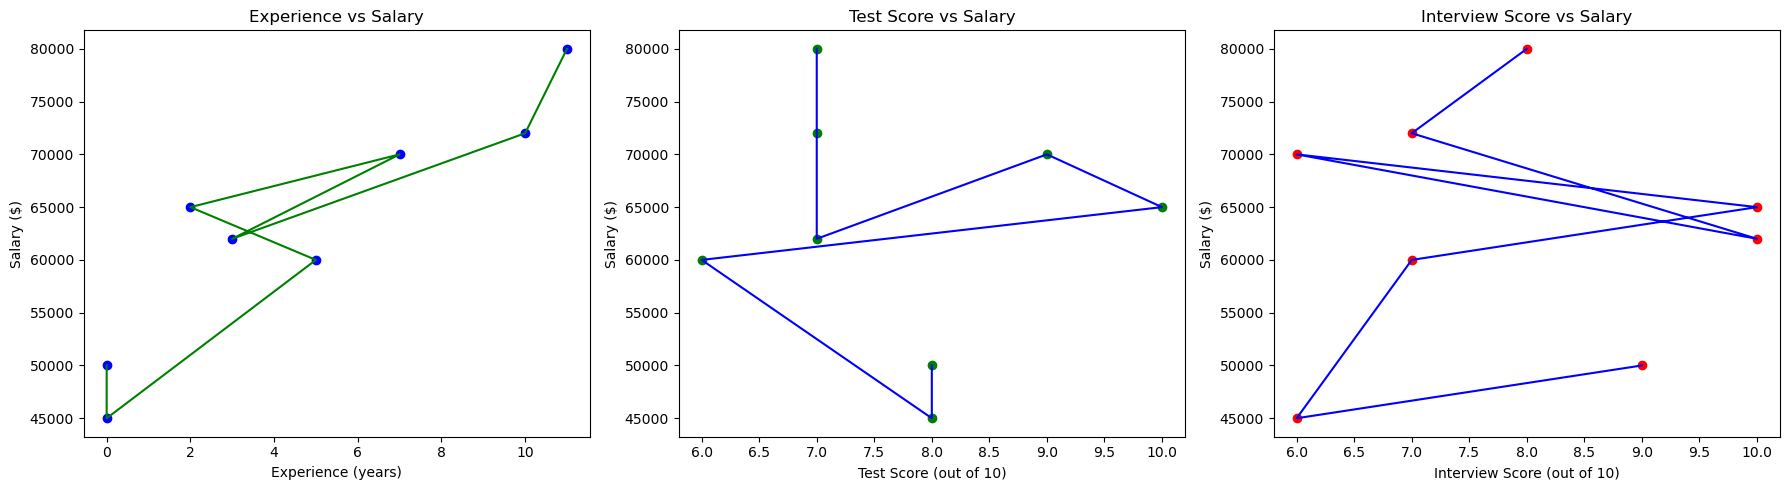

In [13]:
# Create subplots for each independent variable
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot experience vs salary
axes[0].scatter(df['experience'], df['salary($)'], color='blue', label="Data Points")
axes[0].plot(df['experience'], df['salary($)'], color='green', label="Line of Best Fit")
axes[0].set_title('Experience vs Salary')
axes[0].set_xlabel('Experience (years)')
axes[0].set_ylabel('Salary ($)')


# Plot test_score vs salary
axes[1].scatter(df['test_score(out of 10)'], df['salary($)'], color='green', label="Data Points")
axes[1].plot(df['test_score(out of 10)'], df['salary($)'], color='blue', label="Line of Best Fit")
axes[1].set_title('Test Score vs Salary')
axes[1].set_xlabel('Test Score (out of 10)')
axes[1].set_ylabel('Salary ($)')

# Plot interview_score vs salary
axes[2].scatter(df['interview_score(out of 10)'], df['salary($)'], color='red', label="Data Points")
axes[2].plot(df['interview_score(out of 10)'], df['salary($)'], color='blue', label="Line of Best Fit")
axes[2].set_title('Interview Score vs Salary')
axes[2].set_xlabel('Interview Score (out of 10)')
axes[2].set_ylabel('Salary ($)')

# Display the plots
plt.tight_layout() # Ensures that the subplots do not overlap.
plt.show()

In [14]:
# Fitting and training our model using our training dataset `hiring.csv`
X = df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']].values
y = df['salary($)']
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [15]:
coefficients = model.coef_
print("m1 =", coefficients[0])
print("m2 =", coefficients[1])
print("m3 =", coefficients[2])

m1 = 2922.2690150210574
m2 = 2221.3090995890943
m3 = 2147.4825663671563


In [16]:
intercept = model.intercept_
print("b =",intercept)

b = 14992.65144669314


In [17]:
# predict salary for 2 yr experience, 9 test score, 6 interview score candidate:
model.predict([[2, 9, 6]])

array([53713.86677124])

In [18]:
# predict salary for candidate with 12 yr experience, 10 test score, 10 interview score
model.predict([[12, 10, 10]])

array([93747.79628651])